<hr>
<h1><center>Big Data Analytics Final Project</center></h1>
<hr>

# Semi-Structure Data Analytics

## Importing Necessary Libraries

In [2]:
import csv
import pandas as pd
from tabulate import tabulate
import matplotlib.pyplot as plt

## Exploring the Data

##### To start this data analysis project, I began by obtaining the Sample Supplies dataset in JSON format. I accomplished this by establishing a connection to the MongoDB database within VS Code. The connection was established using a MongoDB connection string that included the required credentials. Once connected, I retrieved the data by running this command in the terminal:
`mongoexport --uri=mongodb+srv://<user>:<password>@cluster0.e6jfgzx.mongodb.net/sample_supplies --collection=sales --out="data/sampleSupplies.json"`
##### This command allowed me to export the data from the "sales" collection from "sample_supplies" database in MongoDB, saving it as "sampleSupplies.json" in my local environment.

In [3]:
# Read the JSON file into a DataFrame
data = pd.read_json('data/sampleSupplies.json', lines=True)

In [4]:
data

,_id,saleDate,items,storeLocation,customer,couponUsed,purchaseMethod
0,{'$oid': '5bd761dcae323e45a93ccfe8'},{'$date': '2015-03-23T21:06:49.506Z'},"[{'name': 'printer paper', 'tags': ['office', ...",Denver,"{'gender': 'M', 'age': 42, 'email': 'cauho@wit...",True,Online
1,{'$oid': '5bd761dcae323e45a93ccfe9'},{'$date': '2015-08-25T10:01:02.918Z'},"[{'name': 'envelopes', 'tags': ['stationary', ...",Seattle,"{'gender': 'M', 'age': 50, 'email': 'keecade@h...",False,Phone
2,{'$oid': '5bd761dcae323e45a93ccfea'},{'$date': '2017-06-22T09:54:14.185Z'},"[{'name': 'notepad', 'tags': ['office', 'writi...",Denver,"{'gender': 'M', 'age': 51, 'email': 'worbiduh@...",False,In store
3,{'$oid': '5bd761dcae323e45a93ccfeb'},{'$date': '2015-02-23T09:53:59.343Z'},"[{'name': 'binder', 'tags': ['school', 'genera...",Seattle,"{'gender': 'F', 'age': 45, 'email': 'vatires@t...",False,In store
4,{'$oid': '5bd761dcae323e45a93ccfec'},{'$date': '2017-12-03T18:39:48.253Z'},"[{'name': 'backpack', 'tags': ['school', 'trav...",London,"{'gender': 'M', 'age': 40, 'email': 'dotzu@ib....",False,In store
...,...,...,...,...,...,...,...
4995,{'$oid': '5bd761deae323e45a93ce36b'},{'$date': '2016-01-20T17:29:10.225Z'},"[{'name': 'pens', 'tags': ['writing', 'office'...",Austin,"{'gender': 'F', 'age': 45, 'email': 'du@rum.py...",False,In store
4996,{'$oid': '5bd761deae323e45a93ce36c'},{'$date': '2014-11-29T10:09:41.573Z'},"[{'name': 'pens', 'tags': ['writing', 'office'...",Denver,"{'gender': 'F', 'age': 47, 'email': 'dup@katje...",False,In store
4997,{'$oid': '5bd761deae323e45a93ce36d'},{'$date': '2017-12-25T07:02:51.283Z'},"[{'name': 'binder', 'tags': ['school', 'genera...",Denver,"{'gender': 'M', 'age': 29, 'email': 'losuhse@e...",False,In store
4998,{'$oid': '5bd761deae323e45a93ce36e'},{'$date': '2013-12-07T11:06:25.51Z'},"[{'name': 'notepad', 'tags': ['office', 'writi...",Denver,"{'gender': 'M', 'age': 59, 'email': 'hu@pehabu...",False,Online


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   _id             5000 non-null   object
 1   saleDate        5000 non-null   object
 2   items           5000 non-null   object
 3   storeLocation   5000 non-null   object
 4   customer        5000 non-null   object
 5   couponUsed      5000 non-null   bool  
 6   purchaseMethod  5000 non-null   object
dtypes: bool(1), object(6)
memory usage: 239.4+ KB


In [6]:
data.shape

(5000, 7)

### Data Transformation: From JSON to CSV

##### One of the initial challenges for performing queries was the nested structure of the JSON data. While JSON is a flexible format for storing data, A more structured and tabular format to perform effective queries and analysis is needed. To achieve this, I transform the data into a CSV format.

##### Now I can flatten the dataset and bring out the essential information needed for the analysis. With each row representing a single transaction, the data became more accessible for querying.

##### One key aspect I addressed was the "items" column, which contained nested structures. Each transaction could involve multiple items, and they were stored as arrays of objects within the JSON. To resolve this, I expanded the data so that each item in a transaction occupied its own row. This approach allowed me to work with individual items while maintaining the connection to the original transaction through common identifiers.

In [7]:
# Define the CSV file path
data_csv = "data/sampleSupplies.csv"

# Define the CSV field names (column names)
fieldnames = [
    "itemsName", "itemsQuantity", "itemsPrice",
    "storeLocation", "customerGender", "customerAge",
    "customerEmail", "customerSatisfaction",
    "saleDate", "purchaseMethod", "couponUsed"
]

In [8]:
# Initialize the list to store flattened data
flattened_data = []

# Iterate through the DataFrame
for index, row in data.iterrows():
    sale_date = row["saleDate"]["$date"]
    store_location = row["storeLocation"]
    purchase_method = row["purchaseMethod"]
    coupon_used = row["couponUsed"]

    items = row["items"]
    customer = row["customer"]

    for item in items:
        flattened_row = {
            "itemsName": item["name"],
            "itemsQuantity": item["quantity"],
            "itemsPrice": item["price"]["$numberDecimal"],
            "storeLocation": store_location,
            "customerGender": customer["gender"],
            "customerAge": customer["age"],
            "customerEmail": customer["email"],
            "customerSatisfaction": customer["satisfaction"],
            "saleDate": sale_date,
            "purchaseMethod": purchase_method,
            "couponUsed": coupon_used
        }
        flattened_data.append(flattened_row)

In [9]:
# Write the data to the CSV file
with open(data_csv, mode='w', newline='') as csv_file:
    writer = csv.DictWriter(csv_file, fieldnames=fieldnames)
    writer.writeheader()
    writer.writerows(flattened_data)

print("CSV data has been exported to", data_csv)

CSV data has been exported to data/sampleSupplies.csv


In [10]:
# Load the CSV data into a Pandas DataFrame
data = pd.read_csv('data/sampleSupplies.csv')

In [11]:
data

,itemsName,itemsQuantity,itemsPrice,storeLocation,customerGender,customerAge,customerEmail,customerSatisfaction,saleDate,purchaseMethod,couponUsed
0,printer paper,2,40.01,Denver,M,42,cauho@witwuta.sv,4,2015-03-23T21:06:49.506Z,Online,True
1,notepad,2,35.29,Denver,M,42,cauho@witwuta.sv,4,2015-03-23T21:06:49.506Z,Online,True
2,pens,5,56.12,Denver,M,42,cauho@witwuta.sv,4,2015-03-23T21:06:49.506Z,Online,True
3,backpack,2,77.71,Denver,M,42,cauho@witwuta.sv,4,2015-03-23T21:06:49.506Z,Online,True
4,notepad,2,18.47,Denver,M,42,cauho@witwuta.sv,4,2015-03-23T21:06:49.506Z,Online,True
...,...,...,...,...,...,...,...,...,...,...,...
27433,envelopes,5,24.12,New York,M,33,lihzodud@voblep.ie,3,2014-08-18T06:25:49.739Z,Online,False
27434,pens,4,27.10,New York,M,33,lihzodud@voblep.ie,3,2014-08-18T06:25:49.739Z,Online,False
27435,binder,3,29.09,New York,M,33,lihzodud@voblep.ie,3,2014-08-18T06:25:49.739Z,Online,False
27436,laptop,2,598.79,New York,M,33,lihzodud@voblep.ie,3,2014-08-18T06:25:49.739Z,Online,False


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27438 entries, 0 to 27437
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   itemsName             27438 non-null  object 
 1   itemsQuantity         27438 non-null  int64  
 2   itemsPrice            27438 non-null  float64
 3   storeLocation         27438 non-null  object 
 4   customerGender        27438 non-null  object 
 5   customerAge           27438 non-null  int64  
 6   customerEmail         27438 non-null  object 
 7   customerSatisfaction  27438 non-null  int64  
 8   saleDate              27438 non-null  object 
 9   purchaseMethod        27438 non-null  object 
 10  couponUsed            27438 non-null  bool   
dtypes: bool(1), float64(1), int64(3), object(6)
memory usage: 2.1+ MB


In [13]:
data.shape

(27438, 11)

##### The result is a structured CSV dataset that offers a clear and efficient foundation for our data analytics. The dataset consists of 27,438 rows and 11 columns, each representing a unique transaction. It includes information on the items purchased, their quantities and prices, store locations, customer demographics, satisfaction ratings, sale dates, purchase methods, and coupon usage. Lets analyze the data to gain insights into sales trends, customer preferences, and store performance, offering valuable information for business decisions and strategies.

## Queries

### Query 1: Show top 10 products (name) sales (quantity x price).

In [42]:
# Calculate sales for each product and sort by sales in descending order
data['sales'] = data['itemsQuantity'] * data['itemsPrice']
top_10_products = data.groupby('itemsName')['sales'].sum().sort_values(ascending=False).head(10)
top_10_products = top_10_products.rename_axis('items').reset_index(name='sales')

In [43]:
# Convert the DataFrame to a tabular format
top_10_products_table = tabulate(top_10_products, headers='keys', tablefmt='pretty', showindex=False, stralign="right")

# Print the table
print(top_10_products_table)

+---------------+------------+
|         items |      sales |
+---------------+------------+
|        laptop | 6775977.07 |
|      backpack |   817374.1 |
|          pens |  581843.27 |
|        binder |  511644.57 |
|       notepad |  463615.48 |
|     envelopes |  376658.49 |
| printer paper |  367459.29 |
+---------------+------------+


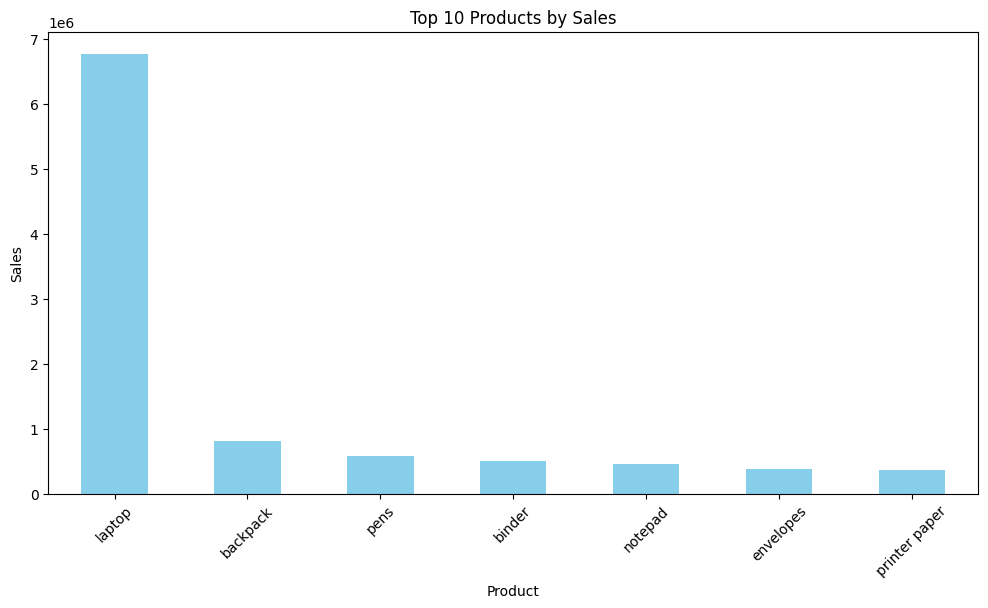

In [46]:
# Top 10 products by sales
top_10_products = data.groupby('itemsName')['sales'].sum().sort_values(ascending=False).head(10)

# Plot the data
plt.figure(figsize=(12, 6))
top_10_products.plot(kind='bar', color='skyblue')
plt.title('Top 10 Products by Sales')
plt.xlabel('Product')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.show()

##### Laptop has the highest sales, reaching approximately $6,775,977.07. This indicates that laptops are the most popular and highest-selling items. The reason Laptop has the highest sales could be due to its relatively high price compared to other items, making each sale of a laptop contribute significantly to the total sales. Additionally, Laptop might be a popular item in demand among customers, contributing to its high sales. Other items like Backpack, Pens,Binder, Notepad, Envelopes, and Printer Paper also make significant contributions to the total sales but are lower in sales compared to Laptop.

### Query 2: Show top 3 products (name) sales by store (location).


In [47]:
top_3_products_by_store = data.groupby(['storeLocation', 'itemsName'])['sales'].sum().reset_index()
top_3_products_by_store = top_3_products_by_store.sort_values(['storeLocation', 'sales'], ascending=[True, False])
top_3_products_by_store = top_3_products_by_store.groupby('storeLocation').head(3)

In [48]:
# Format the DataFrame with two decimal places and right-aligned
top_3_products_by_store['sales'] = top_3_products_by_store['sales'].apply(lambda x: f'{x:.2f}')

# Use tabulate to display the formatted DataFrame
top_3_products_by_store_table = tabulate(top_3_products_by_store, headers='keys', tablefmt='pretty', showindex=False,stralign="right")

print(top_3_products_by_store_table)


+---------------+-----------+------------+
| storeLocation | itemsName |      sales |
+---------------+-----------+------------+
|        Austin |    laptop | 1018494.05 |
|        Austin |  backpack |  115217.59 |
|        Austin |      pens |   74622.52 |
|        Denver |    laptop | 1961659.25 |
|        Denver |  backpack |  245679.34 |
|        Denver |      pens |  185008.39 |
|        London |    laptop | 1073098.72 |
|        London |  backpack |  144529.14 |
|        London |      pens |   92602.30 |
|      New York |    laptop |  694613.32 |
|      New York |  backpack |   82563.14 |
|      New York |      pens |   64029.90 |
|     San Diego |    laptop |  462973.58 |
|     San Diego |  backpack |   50997.42 |
|     San Diego |      pens |   42134.55 |
|       Seattle |    laptop | 1565138.15 |
|       Seattle |  backpack |  178387.47 |
|       Seattle |      pens |  123445.61 |
+---------------+-----------+------------+


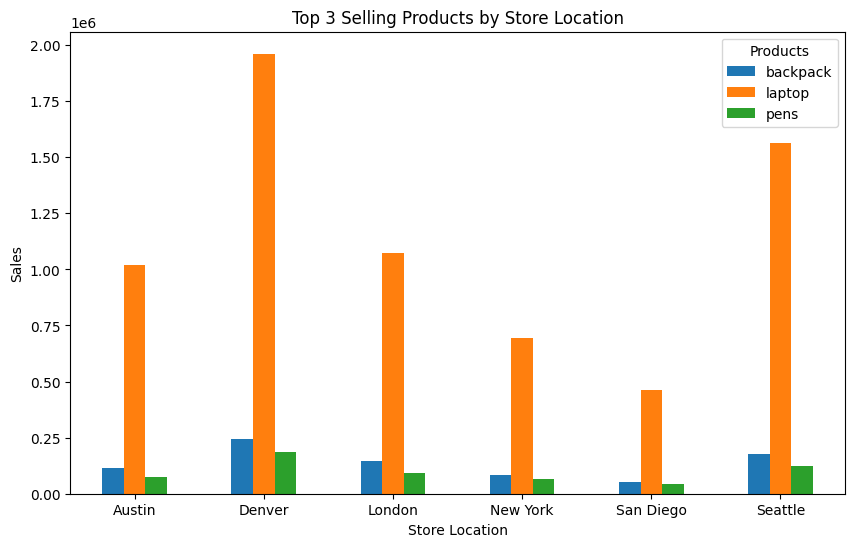

In [49]:
# Ensure the 'sales' column is in numeric format
top_3_products_by_store['sales'] = top_3_products_by_store['sales'].astype(float)

# Pivot the data for the grouped bar chart
pivot_data = top_3_products_by_store.pivot(index='storeLocation', columns='itemsName', values='sales')

# Plot the grouped bar chart
ax = pivot_data.plot(kind='bar', stacked=False, figsize=(10, 6))

# Customize the plot
plt.title('Top 3 Selling Products by Store Location')
plt.xlabel('Store Location')
plt.ylabel('Sales')
plt.legend(title='Products')
plt.xticks(rotation=0)

plt.show()


##### The data shows the total sales of the top three products in each store location. Notably, the laptop category stands out as the highest-selling product in several stores, with Austin, Denver, London, and Seattle all having laptop as their top seller. This suggests that laptops are in high demand across different regions. Additionally, backpack and pens are also consistently among the top-selling products, indicating that these items are popular across multiple store locations.

### Query 3: Show rankings of each store (location).

In [50]:
store_rankings = data.groupby('storeLocation')['sales'].sum().sort_values(ascending=False)


In [51]:
store_rankings = store_rankings.reset_index() 

# Use tabulate to display the DataFrame in a tabular format
store_rankings_table = tabulate(store_rankings, headers='keys', tablefmt='pretty', showindex=False, stralign="right")

print(store_rankings_table)


+---------------+------------+
| storeLocation |      sales |
+---------------+------------+
|        Denver | 2921009.92 |
|       Seattle | 2255947.69 |
|        London | 1583066.79 |
|        Austin | 1445603.11 |
|      New York | 1016059.59 |
|     San Diego |  672885.17 |
+---------------+------------+


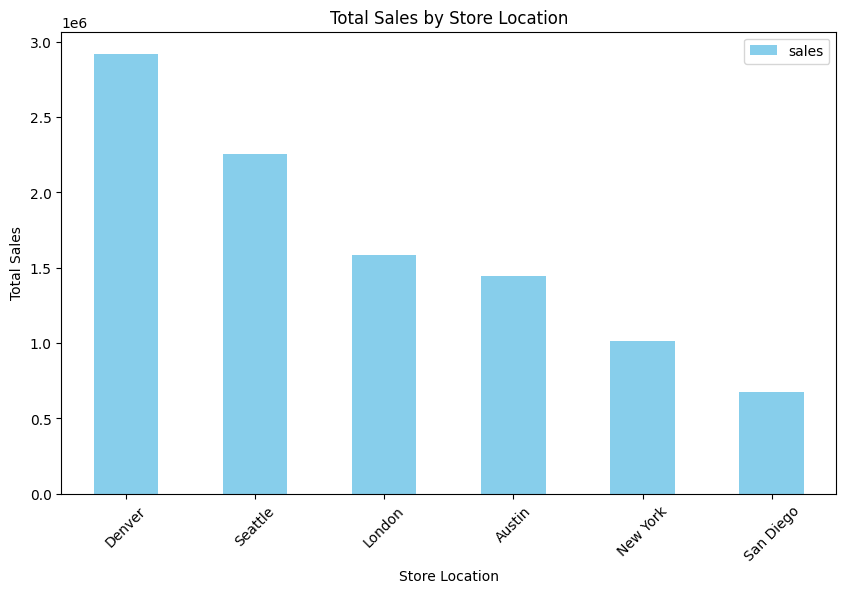

In [52]:
# Plot the data
store_rankings.plot(x='storeLocation', y='sales', kind='bar', figsize=(10, 6), color='skyblue')

# Customize the plot
plt.title('Total Sales by Store Location')
plt.xlabel('Store Location')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)

# Show the plot
plt.show()

##### The bar chart displays the total sales for each store location, revealing interesting insights into their performance. Denver stands out as the top-performing store, with the highest total sales of approximately 2.92 million. Seattle follows closely behind, indicating strong sales performance as well. London and Austin also perform well, with total sales exceeding 1.5 million and 1.4 million, respectively. New York, despite being a large city, has total sales just over 1 million. San Diego lags behind the other stores with sales of approximately 672,885.17.

### Query 4: Show purchased method by gender table

In [23]:
# Replace 'F' with 'Female' and 'M' with 'Male' in the 'customerGender' column
data['customerGender'] = data['customerGender'].replace({'F': 'Female', 'M': 'Male'})
purchased_method_gender_table = pd.crosstab(data['customerGender'], data['purchaseMethod'])


In [24]:
# Modify the column names to have a custom two-level header
purchased_method_gender_table.columns = pd.MultiIndex.from_product([["purchaseMethod"], purchased_method_gender_table.columns])

# Convert the modified DataFrame to a tabular format
purchase_method_table = tabulate(purchased_method_gender_table, headers='keys', tablefmt='pretty', stralign="right")

print(purchase_method_table)


+----------------+--------------------------------+------------------------------+-----------------------------+
| customerGender | ('purchaseMethod', 'In store') | ('purchaseMethod', 'Online') | ('purchaseMethod', 'Phone') |
+----------------+--------------------------------+------------------------------+-----------------------------+
|         Female |                           8062 |                         4270 |                        1499 |
|           Male |                           7571 |                         4314 |                        1722 |
+----------------+--------------------------------+------------------------------+-----------------------------+


In [25]:
# Drop the 'Phone' column
purchased_method_gender_table = purchased_method_gender_table['purchaseMethod'].drop(columns='Phone')
purchased_method_gender_table.columns = pd.MultiIndex.from_product([["purchaseMethod"], purchased_method_gender_table.columns])

# Convert the modified DataFrame to a tabular format
purchase_method_table_without_phone = tabulate(purchased_method_gender_table, headers='keys', tablefmt='pretty', stralign="right")

print(purchase_method_table_without_phone)


+----------------+--------------------------------+------------------------------+
| customerGender | ('purchaseMethod', 'In store') | ('purchaseMethod', 'Online') |
+----------------+--------------------------------+------------------------------+
|         Female |                           8062 |                         4270 |
|           Male |                           7571 |                         4314 |
+----------------+--------------------------------+------------------------------+


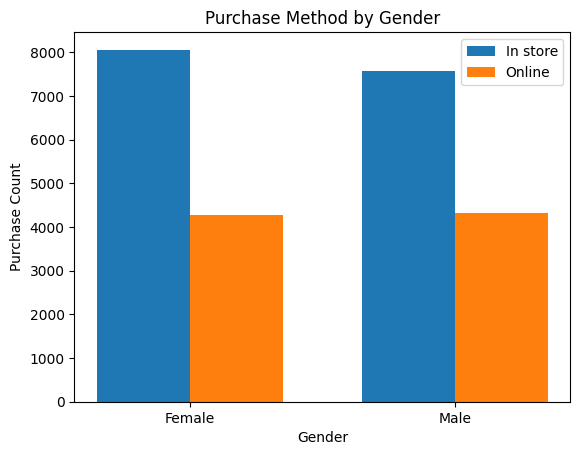

In [26]:
# Data for plotting
gender_purchase_data = {
    'Gender': ['Female', 'Male'],
    'In store': [8062, 7571],
    'Online': [4270, 4314]
}

# Convert data to a DataFrame
df = pd.DataFrame(gender_purchase_data)

# Set the bar width
bar_width = 0.35

# Set the positions and width for the bars
x = range(len(df['Gender']))
x_instore = [i - bar_width/2 for i in x]
x_online = [i + bar_width/2 for i in x]

# Create the figure and axis
fig, ax = plt.subplots()

# Plot the bars
bar1 = ax.bar(x_instore, df['In store'], bar_width, label='In store')
bar2 = ax.bar(x_online, df['Online'], bar_width, label='Online')

# Add labels, title, and legend
ax.set_xlabel('Gender')
ax.set_ylabel('Purchase Count')
ax.set_title('Purchase Method by Gender')
ax.set_xticks(x)
ax.set_xticklabels(df['Gender'])
ax.legend()

# Show the plot
plt.show()


##### The grouped bar chart visualizes the purchase methods ("In store" and "Online") by gender ("Female" and "Male"). From the chart, it's evident that both genders have a higher preference for shopping "In store" compared to "Online." Females have a slightly higher purchase count for "In store" than males, while males have a slightly higher count for "Online" purchases.

### Query 5: Show monthly total sales

In [27]:
# Convert the 'saleDate' column to a datetime format with a flexible format
data['saleDate'] = pd.to_datetime(data['saleDate'], format='ISO8601', errors='coerce')

# Drop rows with invalid date values (if any)
data.dropna(subset=['saleDate'], inplace=True)

# Set the 'saleDate' column as the index
data.set_index('saleDate', inplace=True)
data.index.name = None

# Resample the data by month and calculate the sum of sales for each month
monthly_sales = data['sales'].resample('M').sum()
monthly_sales.index = monthly_sales.index.strftime('%Y-%m-%d')

monthly_sales_df = monthly_sales.to_frame().reset_index()
monthly_sales_df.columns = ['DateTime', 'Sales']

# Format the 'Sales' column with two decimal places
monthly_sales_df['Sales'] = monthly_sales_df['Sales'].apply(lambda x: f"{x:.2f}")

# Display the data in tabular format
table = tabulate(monthly_sales_df, headers='keys', tablefmt='pretty', showindex=False, stralign="right")
print(table)


+------------+-----------+
|   DateTime |     Sales |
+------------+-----------+
| 2013-01-31 | 196043.76 |
| 2013-02-28 | 147622.59 |
| 2013-03-31 | 140700.06 |
| 2013-04-30 | 162336.67 |
| 2013-05-31 | 179143.37 |
| 2013-06-30 | 142132.02 |
| 2013-07-31 | 176298.23 |
| 2013-08-31 | 130977.22 |
| 2013-09-30 | 137871.99 |
| 2013-10-31 | 173126.73 |
| 2013-11-30 | 148358.38 |
| 2013-12-31 | 174306.96 |
| 2014-01-31 | 125824.02 |
| 2014-02-28 | 141174.41 |
| 2014-03-31 | 193413.50 |
| 2014-04-30 | 132593.08 |
| 2014-05-31 | 166896.80 |
| 2014-06-30 | 143304.56 |
| 2014-07-31 | 184804.60 |
| 2014-08-31 | 167979.81 |
| 2014-09-30 | 159802.92 |
| 2014-10-31 | 149284.84 |
| 2014-11-30 | 180564.85 |
| 2014-12-31 | 139466.83 |
| 2015-01-31 | 222577.01 |
| 2015-02-28 | 189776.15 |
| 2015-03-31 | 178086.94 |
| 2015-04-30 | 132298.50 |
| 2015-05-31 | 167482.69 |
| 2015-06-30 | 149484.34 |
| 2015-07-31 | 149510.47 |
| 2015-08-31 | 154868.63 |
| 2015-09-30 | 135615.80 |
| 2015-10-31 | 175215.34 |
|

C:\Users\Acer\AppData\Local\Temp\ipykernel_18168\1912441552.py:9: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  monthly_sales = data_reset.groupby(data_reset['saleDate'].dt.to_period('M'))['sales'].sum()


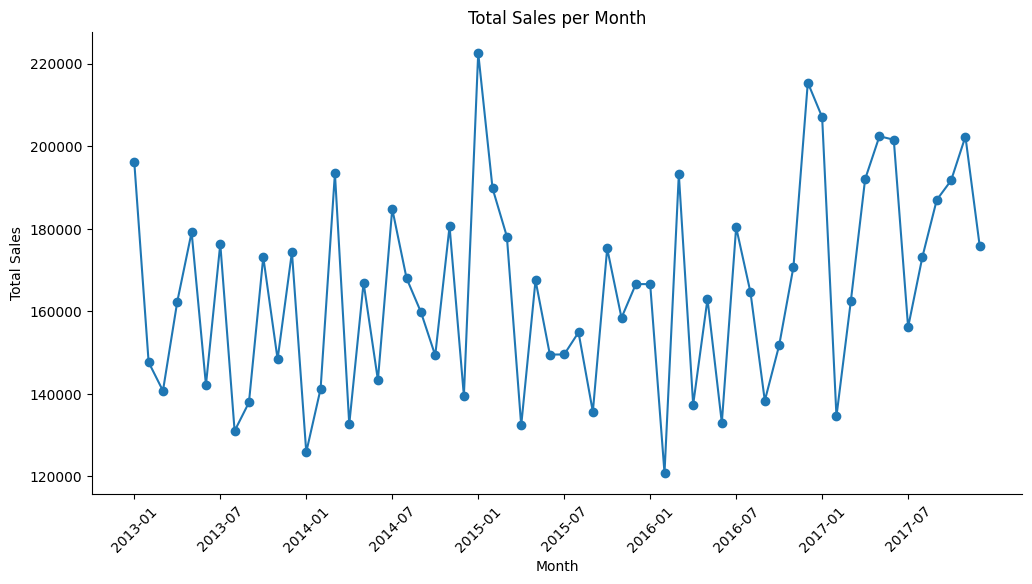

In [28]:
data.index.name = 'saleDate'
# Reset the index to flatten the DataFrame
data_reset = data.reset_index()

# Convert the 'saleDate' column to a datetime format
data_reset['saleDate'] = pd.to_datetime(data_reset['saleDate'])

# Group the data by month and calculate total sales
monthly_sales = data_reset.groupby(data_reset['saleDate'].dt.to_period('M'))['sales'].sum()

# Convert the PeriodIndex to strings for plotting
monthly_sales.index = monthly_sales.index.strftime('%Y-%m')

# Plot the time series chart
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales.index, monthly_sales, marker='o', linestyle='-')
plt.title('Total Sales per Month')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid(False)  # Remove the background grid lines

# Remove top and right borders
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# Show the plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.xticks(monthly_sales.index[::6])  # Show labels for every 6 months
plt.show()


##### The time series chart displays monthly sales data spanning from January 2013 to December 2017. Upon analyzing the chart, it's evident that there is no clear and consistent pattern in sales trends throughout the years. However, Sales data tends to peak during the first month of the year (January) for most years, except for 2014 when sales were lower compared to the previous year. This peak may be attributed to several factors, including post-holiday spending, New Year's resolutions to purchase new items, and an increased demand for products after the holiday season. Customers often seek new and improved products as they start the year, leading to a surge in sales.

## Conclusions

##### The analysis of this sales dataset provides valuable insights into customer preferences and store performance. Laptop emerges as the highest-selling item, indicating its popularity and the significant contribution it makes to total sales. The combination of a relatively high price and strong customer demand positions laptops as a top-performing product. However, other items like backpacks, pens, binders, notepads, envelopes, and printer paper also contribute substantially to the overall sales.

##### Moreover, the analysis of store-specific data reveals that laptops are a consistent top-seller across different locations, underscoring their universal appeal. Denver stands out as the top-performing store, with strong sales figures, closely followed by Seattle, London, and Austin. The preference for in-store purchases over online methods is evident in the grouped bar chart, with slight variations between genders. Finally, while no consistent annual sales pattern is observed, the regular sales peaks in January suggest that post-holiday spending and New Year's resolutions play a significant role in driving higher sales at the beginning of the year. These insights can inform strategic decisions and marketing initiatives for optimizing sales performance and customer satisfaction.